# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

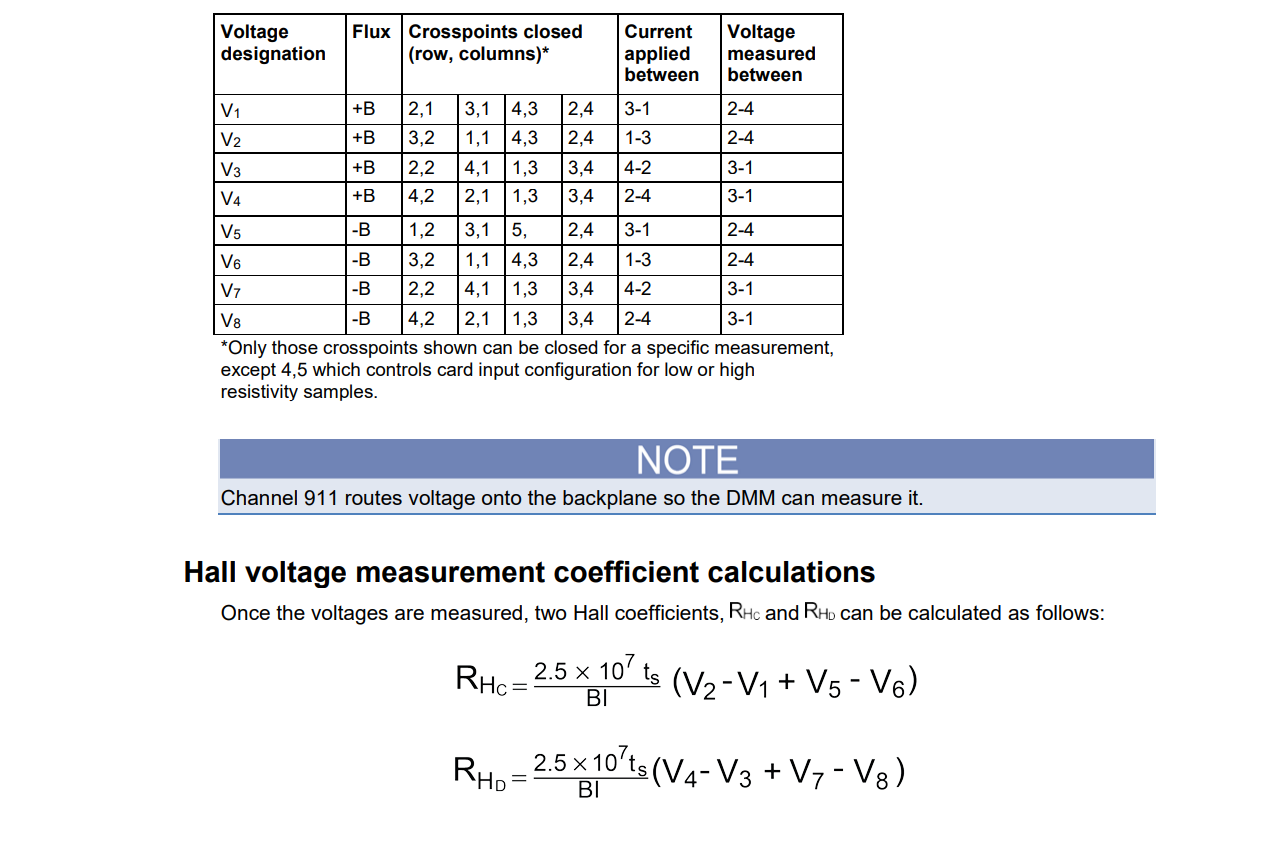

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [2]:
truncate = False # True it contains data from O to Bmax
path = r"C:\Users\Admin\Desktop\Analysis\Data\A302\HALL"
filename = 'A302_DSO_2p_to_2n_300K.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00002,10000.440723,299.999527,-121.838948,121.855241,121.842439,-121.796424,5.536000e-07,1000000.0
1,0.00002,9000.528613,300.001323,-121.812969,121.870645,121.840613,-121.792227,5.618000e-07,1000000.0
2,0.00002,8000.399536,299.999207,-121.826386,121.861903,121.819090,-121.815964,5.974000e-07,1000000.0
3,0.00002,7000.499512,300.000085,-121.822613,121.854981,121.843077,-121.782245,5.836000e-07,1000000.0
4,0.00002,6000.482666,300.000891,-121.818718,121.854482,121.819141,-121.804524,6.136000e-07,1000000.0
...,...,...,...,...,...,...,...,...,...
61,0.00002,6000.261572,300.001006,-121.828467,121.852964,121.842748,-121.821163,5.050000e-07,1000000.0
62,0.00002,7000.496997,300.001335,-121.820593,121.871015,121.831736,-121.796764,4.963000e-07,1000000.0
63,0.00002,8000.383887,300.000993,-121.843026,121.869370,121.836693,-121.813066,5.093000e-07,1000000.0
64,0.00002,9000.322363,300.000195,-121.815984,121.844887,121.832341,-121.791725,4.936000e-07,1000000.0


### Converting B to integer B

In [4]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [5]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00002,10000.440723,10000,299.999527,-121.838948,121.855241,121.842439,-121.796424,5.536000e-07,1000000.0
1,0.00002,9000.528613,9000,300.001323,-121.812969,121.870645,121.840613,-121.792227,5.618000e-07,1000000.0
2,0.00002,8000.399536,8000,299.999207,-121.826386,121.861903,121.819090,-121.815964,5.974000e-07,1000000.0
3,0.00002,7000.499512,7000,300.000085,-121.822613,121.854981,121.843077,-121.782245,5.836000e-07,1000000.0
4,0.00002,6000.482666,6000,300.000891,-121.818718,121.854482,121.819141,-121.804524,6.136000e-07,1000000.0


In [6]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

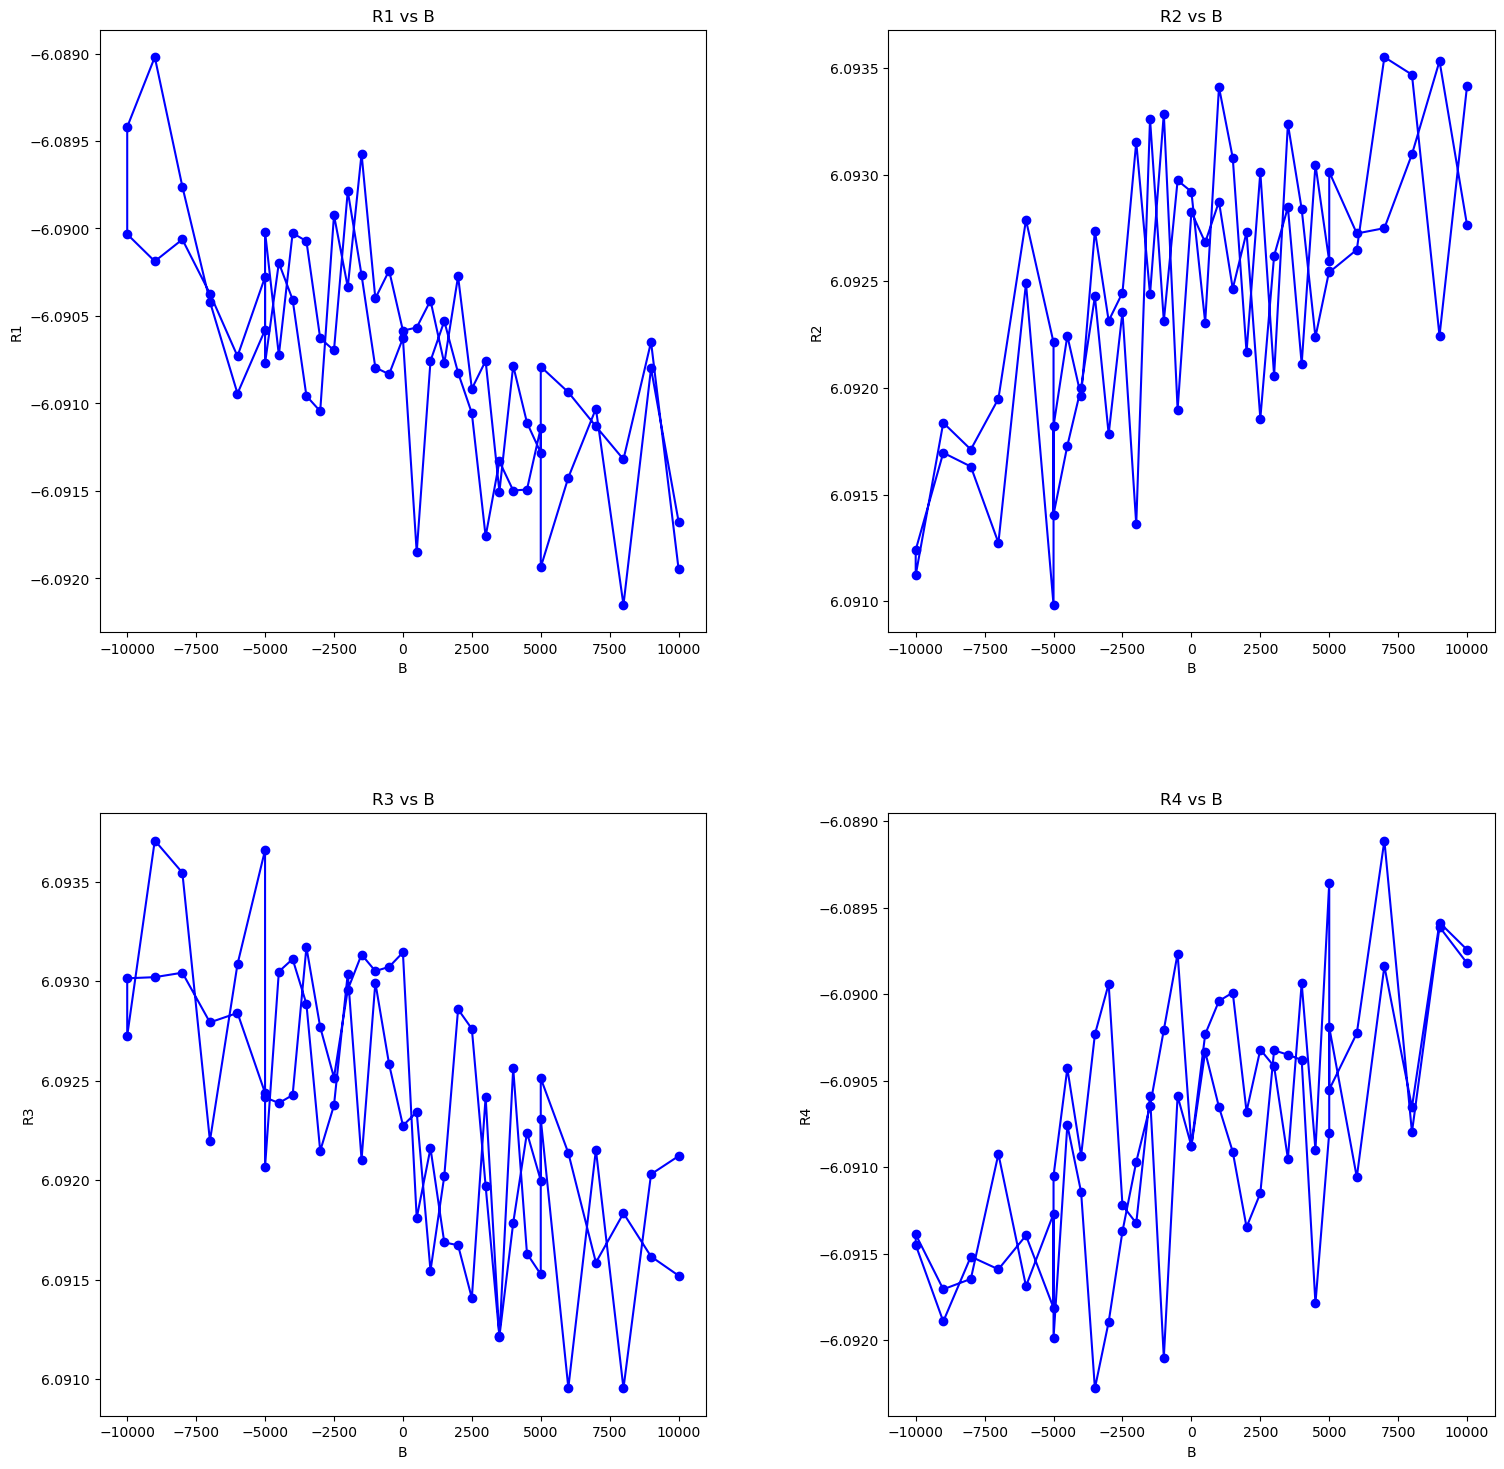

In [7]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [8]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

0


In [9]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

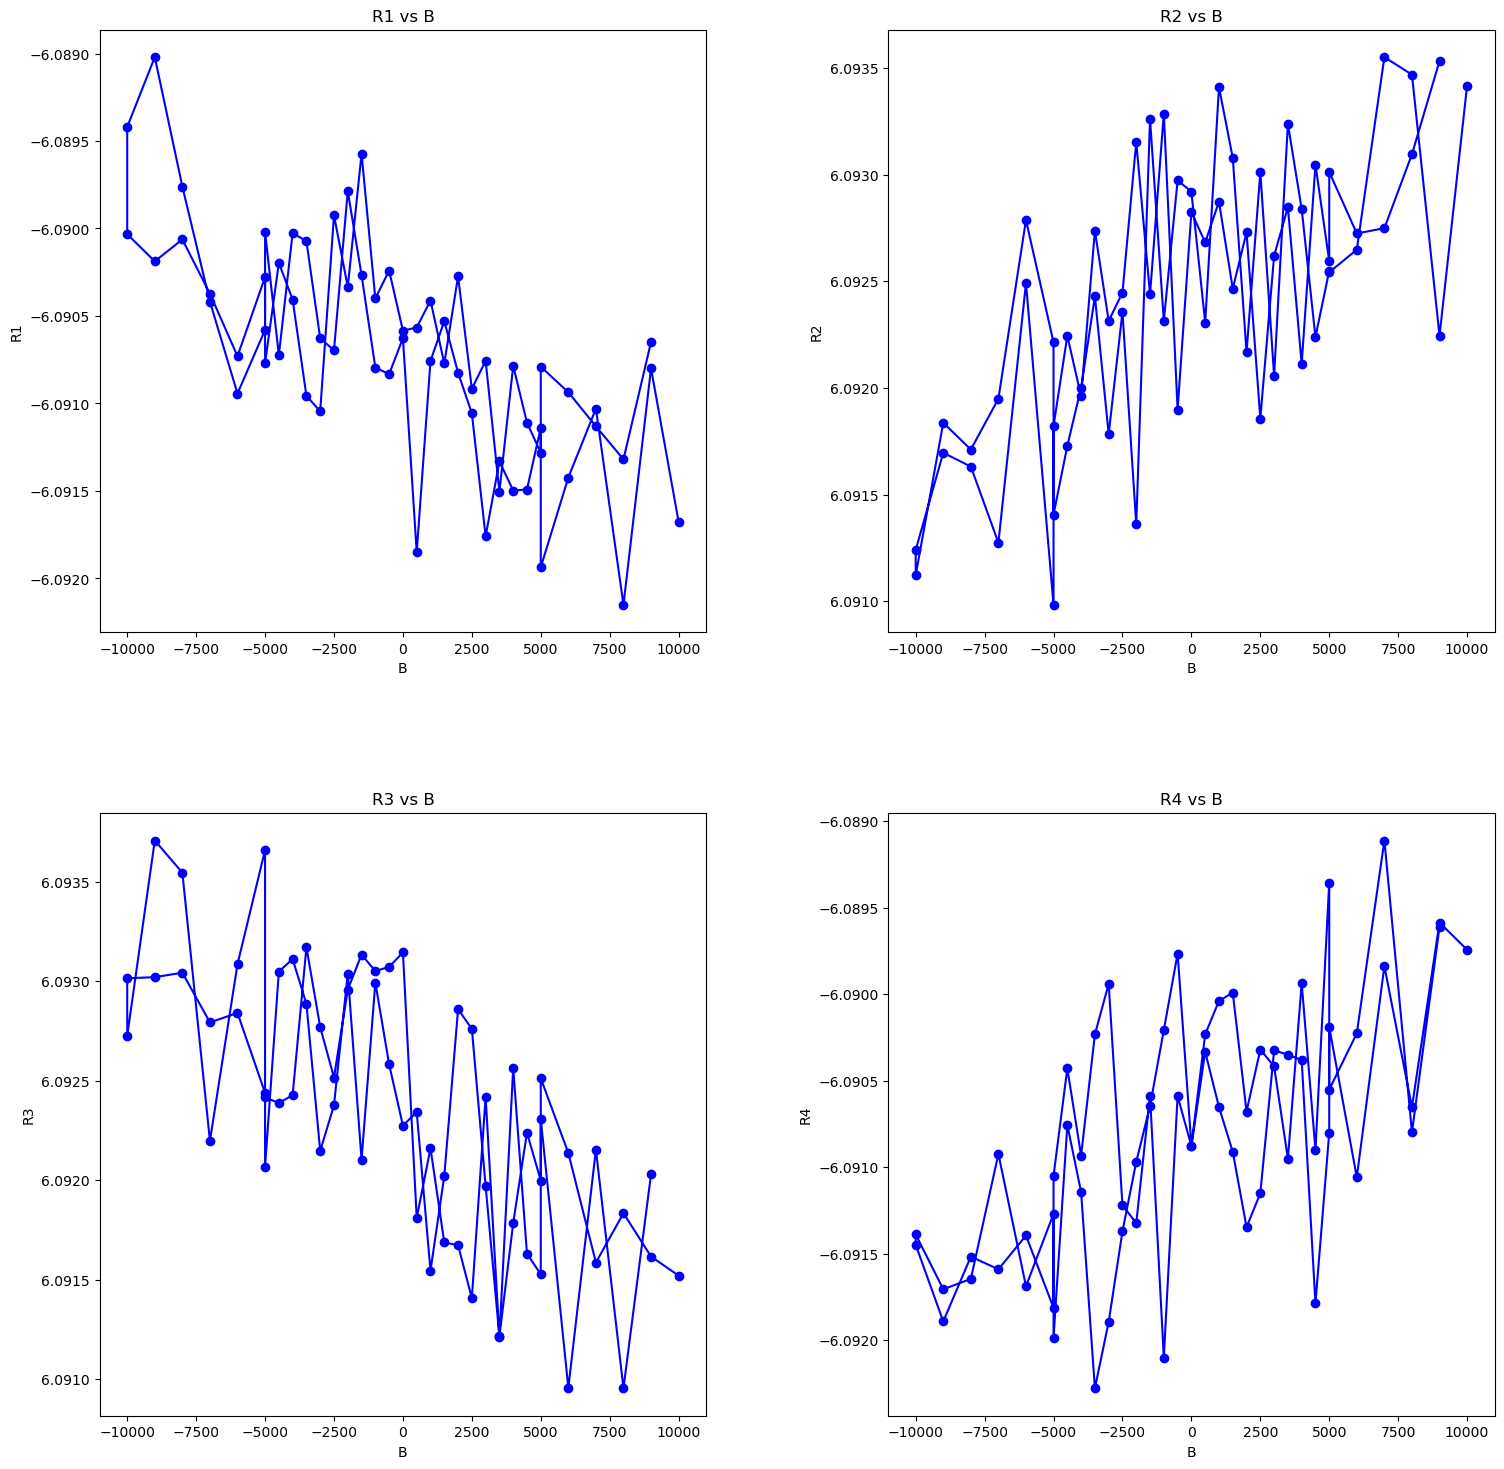

In [10]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [11]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [12]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

31

In [13]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [14]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00002,9000.528613,9000,300.001323,-121.812969,121.870645,121.840613,-121.792227,5.618000e-07,1000000.0
1,0.00002,8000.399536,8000,299.999207,-121.826386,121.861903,121.819090,-121.815964,5.974000e-07,1000000.0
2,0.00002,7000.499512,7000,300.000085,-121.822613,121.854981,121.843077,-121.782245,5.836000e-07,1000000.0
3,0.00002,6000.482666,6000,300.000891,-121.818718,121.854482,121.819141,-121.804524,6.136000e-07,1000000.0
4,0.00002,5000.396802,5000,300.000090,-121.815792,121.860257,121.846168,-121.811028,6.236000e-07,1000000.0


In [15]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
32,0.00002,-10000.391260,-10000,300.000394,-121.788392,121.822452,121.860308,-121.828972,5.143000e-07,1000000.0
33,0.00002,-9000.419141,-9000,300.001343,-121.780411,121.836738,121.860423,-121.837826,5.399000e-07,1000000.0
34,0.00002,-8000.302148,-8000,300.000615,-121.795207,121.834231,121.860872,-121.830331,5.384000e-07,1000000.0
35,0.00002,-7000.360620,-7000,299.999991,-121.808365,121.838991,121.855876,-121.831799,5.306000e-07,1000000.0
36,0.00002,-6000.395435,-6000,300.000983,-121.818860,121.855745,121.856825,-121.827891,5.327000e-07,1000000.0


In [16]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [17]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00002,9000,300.001323,-121.812969,121.870645,121.840613,-121.792227,-121.780411,121.836738,121.860423,-121.837826,1000000.0
1,0.00002,8000,299.999207,-121.826386,121.861903,121.819090,-121.815964,-121.795207,121.834231,121.860872,-121.830331,1000000.0
2,0.00002,7000,300.000085,-121.822613,121.854981,121.843077,-121.782245,-121.808365,121.838991,121.855876,-121.831799,1000000.0
3,0.00002,6000,300.000891,-121.818718,121.854482,121.819141,-121.804524,-121.818860,121.855745,121.856825,-121.827891,1000000.0
4,0.00002,5000,300.000090,-121.815792,121.860257,121.846168,-121.811028,-121.811592,121.844266,121.848785,-121.836262,1000000.0


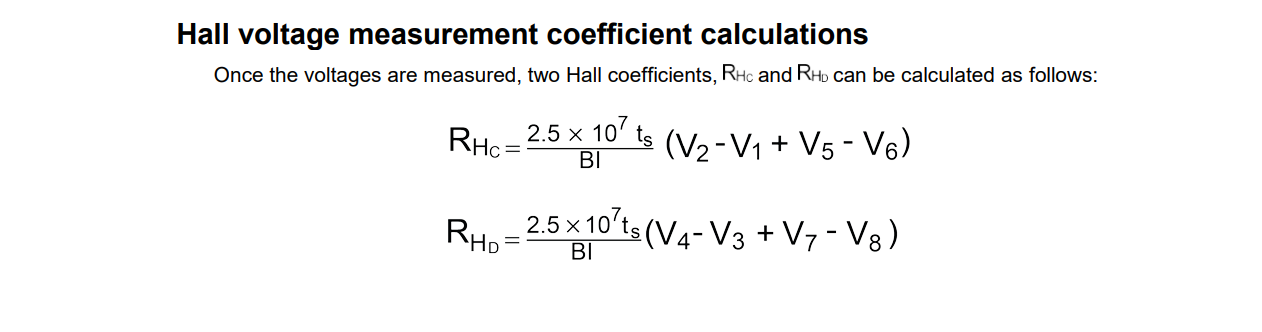
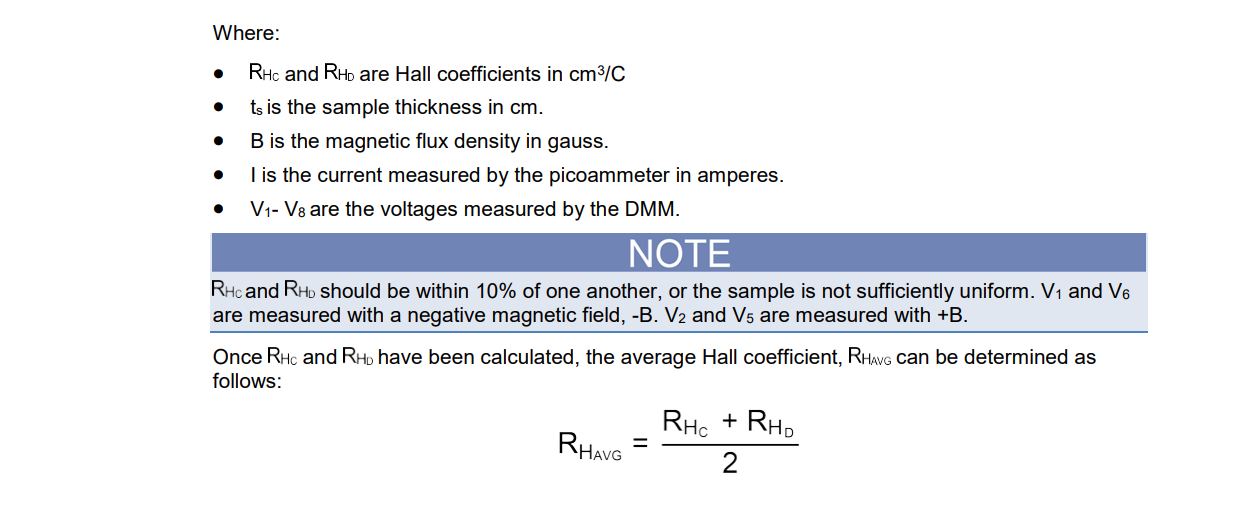

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [18]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

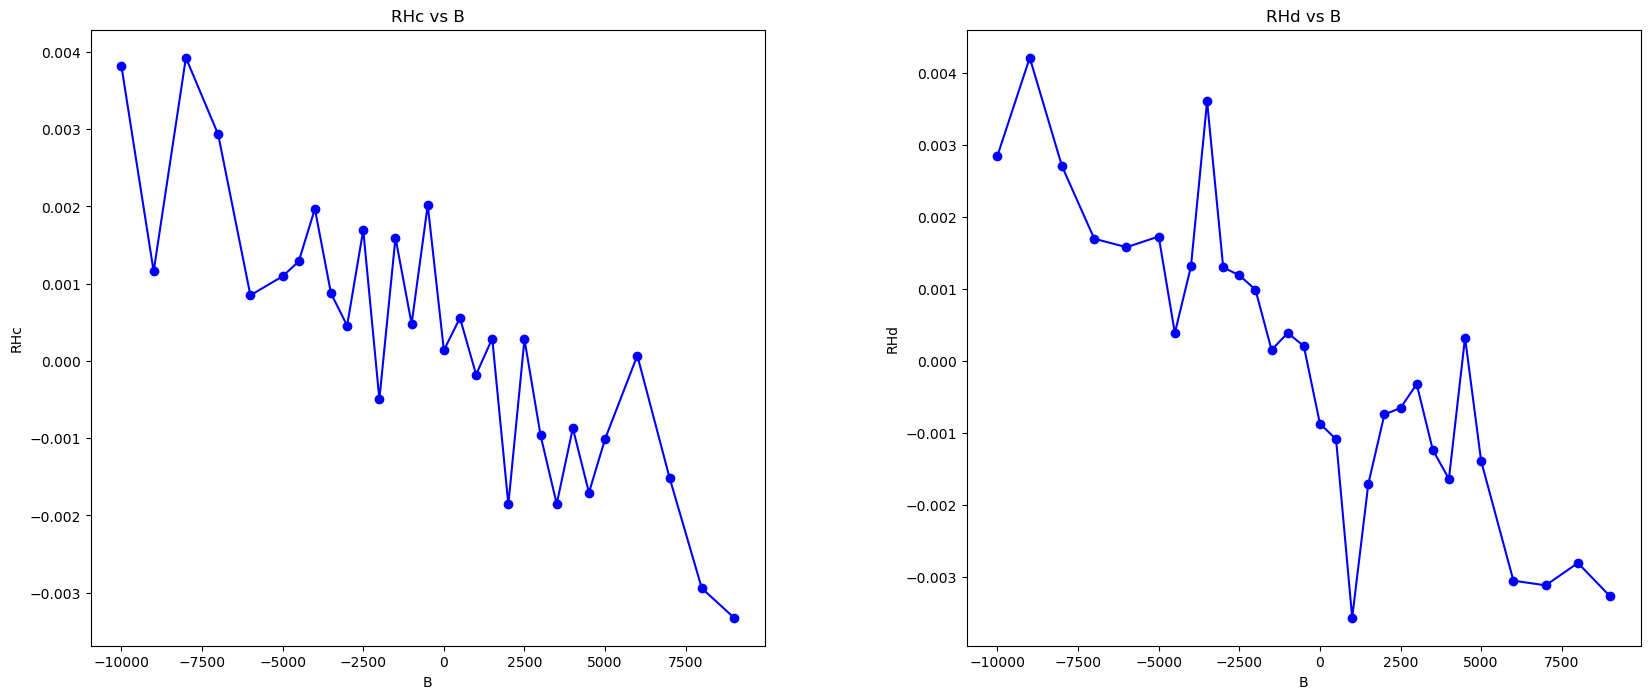

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

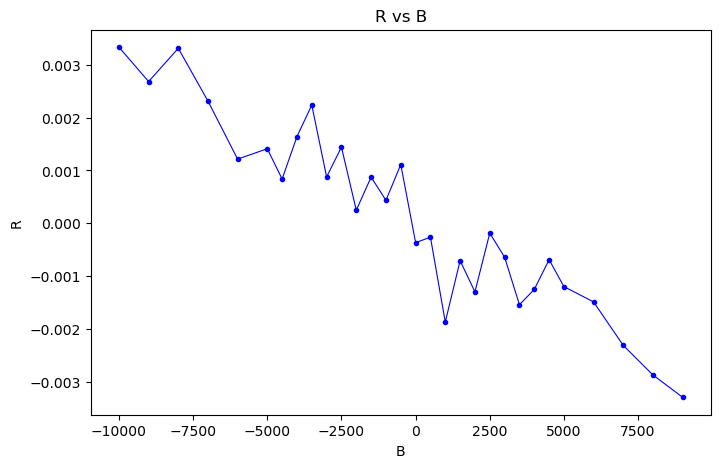

In [20]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [21]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00002,-9000,300.001343,-121.780411,121.836738,121.860423,-121.837826,-121.812969,121.870645,121.840613,-121.792227,1000000.0
1,0.00002,-8000,300.000615,-121.795207,121.834231,121.860872,-121.830331,-121.826386,121.861903,121.819090,-121.815964,1000000.0
2,0.00002,-7000,299.999991,-121.808365,121.838991,121.855876,-121.831799,-121.822613,121.854981,121.843077,-121.782245,1000000.0
3,0.00002,-6000,300.000983,-121.818860,121.855745,121.856825,-121.827891,-121.818718,121.854482,121.819141,-121.804524,1000000.0
4,0.00002,-5000,300.001434,-121.811592,121.844266,121.848785,-121.836262,-121.815792,121.860257,121.846168,-121.811028,1000000.0


### Hall resistance calculation

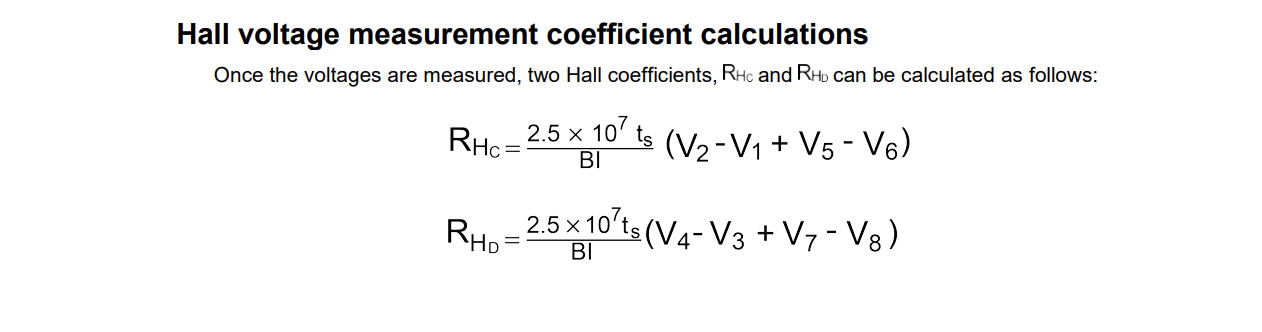

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [22]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

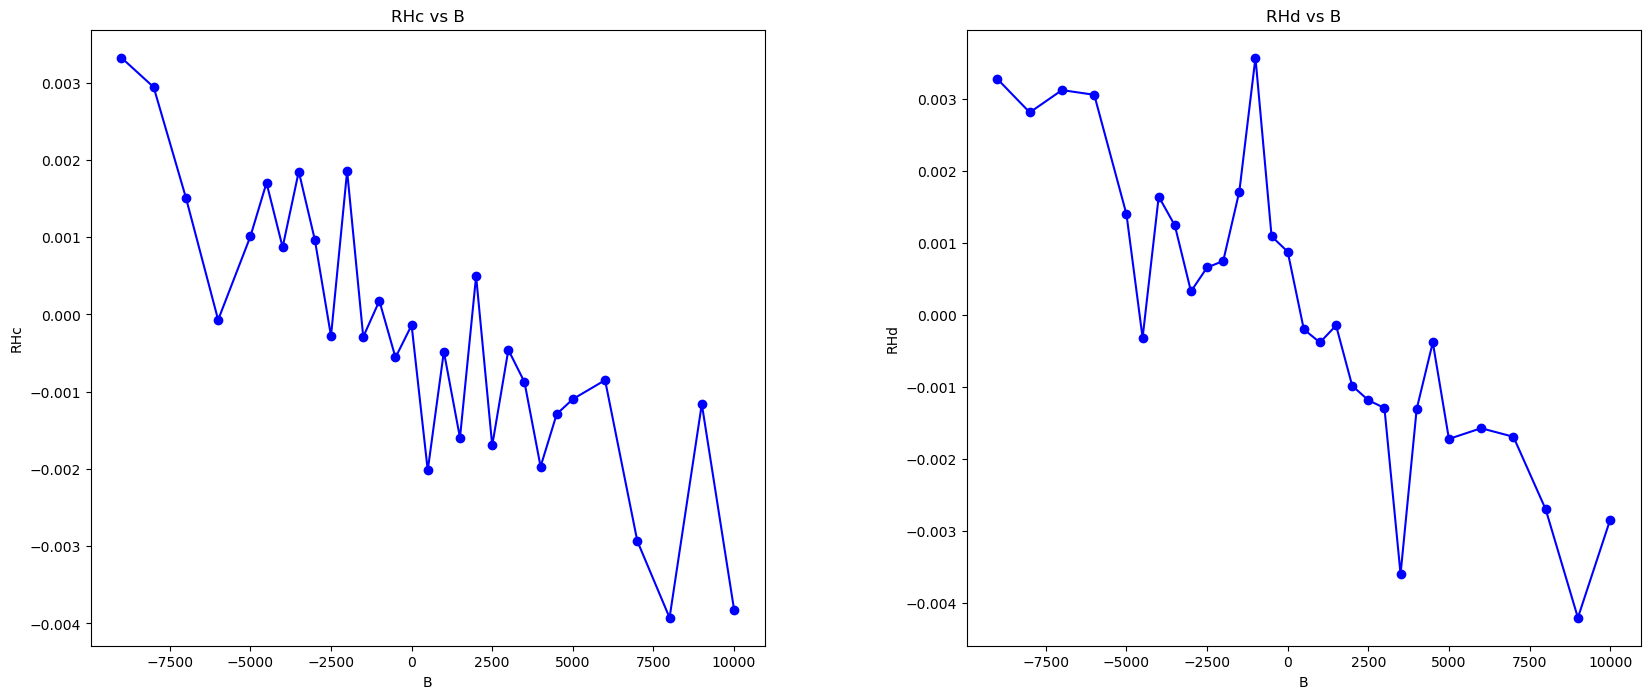

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

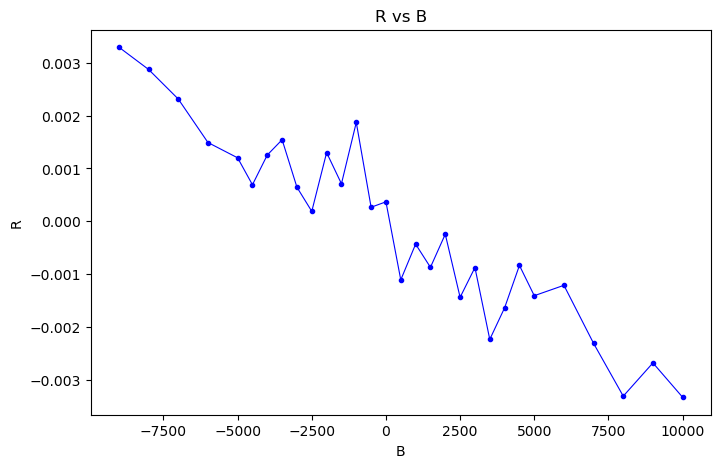

In [24]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

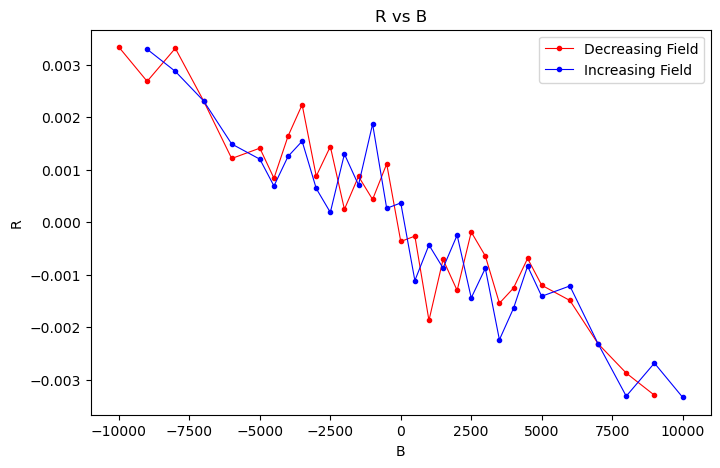

In [25]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [26]:
data = pd.concat([data_dec,data_inc])
data.reset_index(drop=True, inplace = True)
data.to_csv(f'{filename}')